In [1]:
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfftfreq, irfft
import plotly.express as px


We have a signal with a sampling rate of 44.1 kHz (like CD).

We follow the signal over a duration of 0.01 sec.

There are three components in the signal, with different frequencies: 200, 500, and 1000 Hz.

Each component has a different amplitude: 0.1, 0.2, 0.5.

In [2]:
sample_rate = 44100
duration = 0.01
frequencies = [200, 500, 1000]
amplitudes = [0.1, 0.2, 0.5]
nc = len(frequencies)

x = np.linspace(
    start=0, stop=duration, num=round(sample_rate * duration), endpoint=False
)
y = np.zeros(shape=x.shape, dtype=x.dtype)

signal = pd.DataFrame({"time": x, "amplitude": y})

for i in range(nc):
    # using cosine here to match irfft() default phase behavior
    ai = np.cos(2 * np.pi * x * frequencies[i]) * amplitudes[i]
    signal["component_" + str(i)] = ai
    y += ai
signal["amplitude"] = y


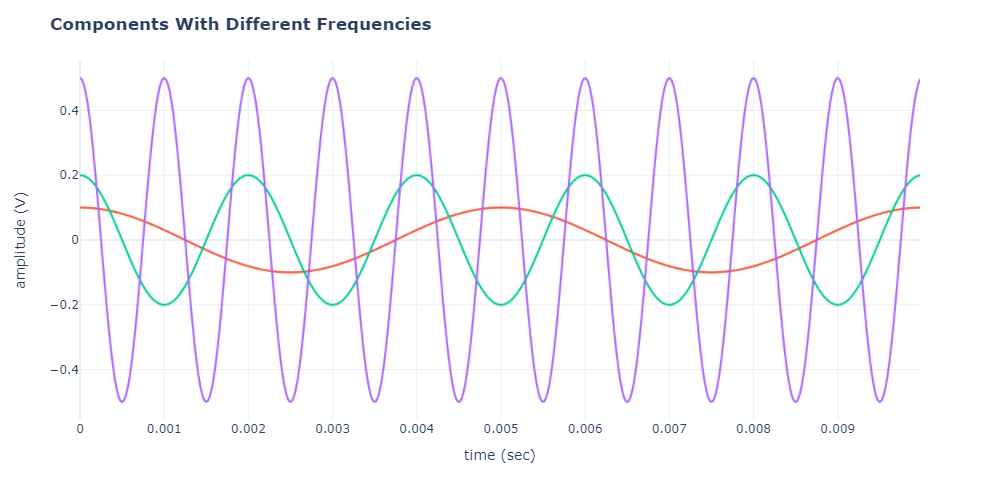

In [3]:
px.line(
    data_frame=signal,
    x="time",
    y=["component_" + str(i) for i in range(nc)],
    width=1000,
    height=500,
    color_discrete_sequence=px.colors.qualitative.Plotly[1:],
).update_layout(
    xaxis_title="time (sec)",
    yaxis_title="amplitude (V)",
    title="<b>Components With Different Frequencies</b>",
    showlegend=False,
    template="plotly_white",
).show(
    "png"
)


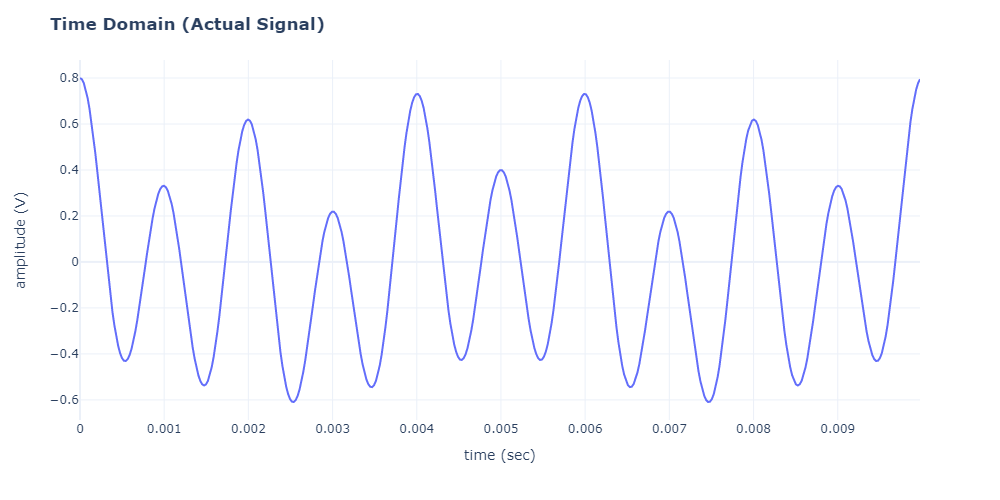

In [4]:
px.line(
    data_frame=signal,
    x="time",
    y="amplitude",
    width=1000,
    height=500,
).update_layout(
    xaxis_title="time (sec)",
    yaxis_title="amplitude (V)",
    title="<b>Time Domain (Actual Signal)</b>",
    showlegend=False,
    template="plotly_white",
).show("png")


From the signal, we extract the frequency spectrum and visualize it.

The spectrum is extracted with the Fourier transform.

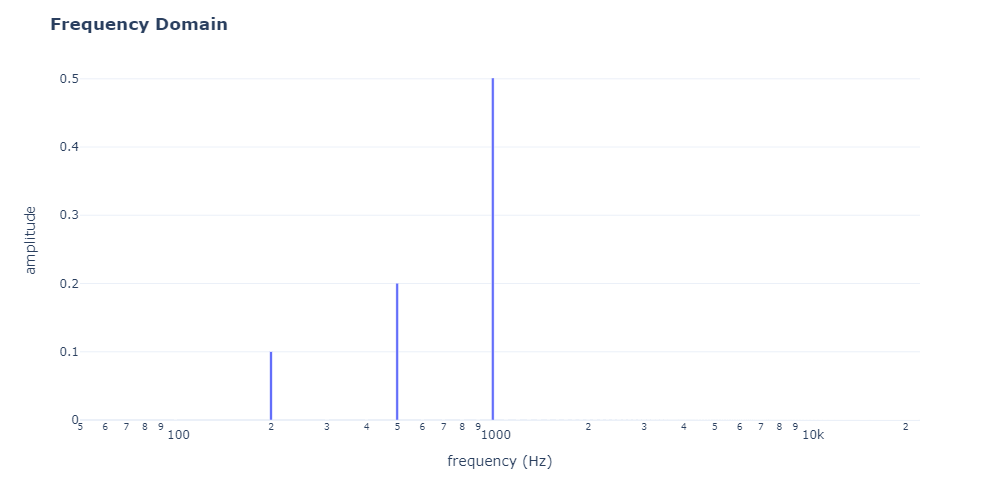

In [5]:
yf = np.abs(rfft(signal["amplitude"].to_numpy()))
xf = rfftfreq(round(sample_rate * duration), 1 / sample_rate)

spectrum = pd.DataFrame({"frequency": xf, "amplitude": yf})

# rfft() has an amplitude factor that requires / 220 for visualization
px.bar(
    x=spectrum["frequency"],
    y=spectrum["amplitude"] / 220,
    log_x=True,
    width=1000,
    height=500,
).update_traces(width=spectrum["frequency"] / 50).update_layout(
    xaxis_title="frequency (Hz)",
    yaxis_title="amplitude",
    title="<b>Frequency Domain</b>",
    template="plotly_white",
).show("png")


From the spectrum, we re-construct the original signal and visualize it.

The reconstruction is done with the inverse Fourier transform.

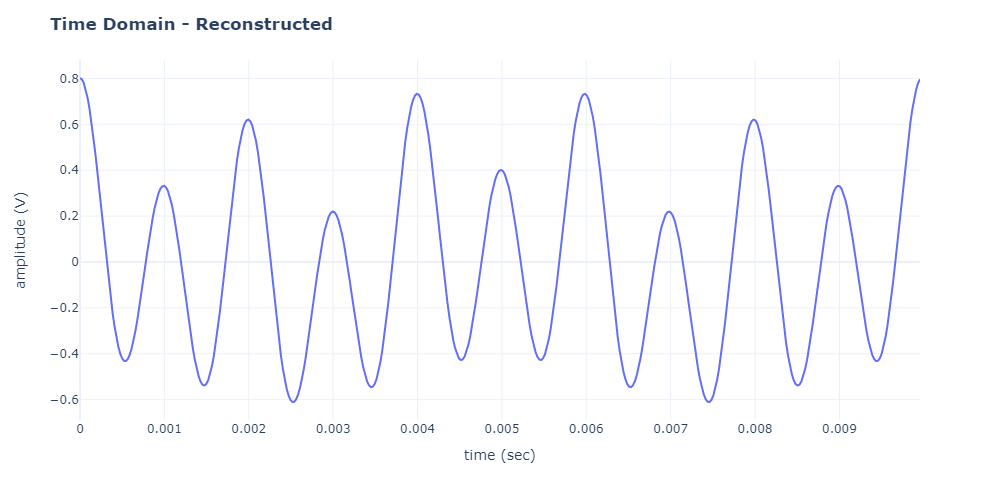

In [6]:
reconstructed_amplitude = irfft(yf)
px.line(x=x[:-1], y=reconstructed_amplitude, width=1000, height=500).update_layout(
    xaxis_title="time (sec)",
    yaxis_title="amplitude (V)",
    title="<b>Time Domain - Reconstructed</b>",
    template="plotly_white",
).show("png")


The reconstructed signal is identical with the original signal.

All information about the signal is contained in the frequency spectrum.